## Coletor de Keywords de Links Pertinentes

In [1]:
import newspaper # Biblioteca que analisa noticias com suporte a Natural Language Processing em Português
import time # Habilita um delay entre os crawls/scraps para que não sufoque os sites acessados, acarretando bloqueio.
from newspaper import Article

train = 'news_list_positive.txt'
saved_kw = 'kw_learn_positive_results.txt'
kw_list_train = 'kw_list_positive.txt'
tgt = '1' # 0 ou 1, sendo 0 para noticia negativa e 1 para noticia positiva (uso violento ou não de ADF)

In [2]:
# BACKUP DAS KW - Cria uma variável com as leituras do arquivo, para caso este seja sobrescrito.
#fileHandle= open(saved_kw, 'r')
#mem = fileHandle.readlines()
#fileHandle.close()

In [3]:
kw_list = [] # cria uma lista em branco
news_dates = [] # lista de data de publicação
news_titles = [] # lista de titulos
news_summary = [] # lista de resumos
news_authors = [] # lista de autores
news_target = [] # lista de targets

fileHandle = open(train,'r') #Opens the log file of interest
url_news = fileHandle.readlines() #reads the logfile contents into memory as a list
fileHandle.close() # fecha o arquivo para não travar a proxima abertura

In [4]:
def get_kw(url):
    article = Article(url, fetch_images=False, language='pt', request_timeout=200) # Leitura de artigos individualmente, e não baixa as imagens.
    article.download() # baixa
    article.parse() # prepara
    article.nlp() # processa
    print(article.title)
    print(article.publish_date)
    print(article.keywords)
    print('\n')

    kw_list.append(article.keywords) # concatena as keywords na lista criada anteriormente
    news_dates.append(article.publish_date)
    news_titles.append(article.title)
    news_summary.append(article.summary)
    #news_author.append(article.authors)
    news_target.append(tgt)
    time.sleep(5)
    
# kw_list resulta em uma lista de listas. abaixo os elementos são listados em uma única lista.
# exemplo: [[a,b,c],[d,e,f],[a,e,f]] --> [a,a,b,c,d,e,e,f,f]

def kw_clear():
    kw_learn=[] # lista utilizável para aprendizado, já limpa e organizável
    for kw in kw_list: # para cada lista de kw, na lista de listas de kws.
        for sub_kw in kw: # para cada kw dentro da lista de kws.
            kw_learn.append(sub_kw)
            #print(kw_learn)
    return sorted(kw_learn,key=kw_learn.count,reverse=True) # ordena as kw por ordem de 
                                                            #frequência de aparecimento nas noticias

In [5]:
print("Getting info from {} articles".format(len(url_news)))
for url in url_news: # para cada url no arquivo lido
    print("URL {}".format(url_news.index(url)))
    url = url.strip() # corta as pontas do link, removendo quebra-linhas e espaços
    try:
        get_kw(url) # chama a função para extrair kw de cada url
        print("done with: ",url)
        print("\n")
    except:
        print("Uh oh! We got an error. NEXT!")
print("done!")

Getting info from 114 articles
URL 0
PM é baleado na cabeça quando chegava para trabalhar na Rocinha
2019-03-05 00:00:00
['saúde', 'soldado', 'polícia', 'upp', 'rocinhaele', 'baleado', 'policiais', 'pm', 'cabeça', 'volta', 'serviço', 'chegava', 'rocinha', 'unidade']


done with:  https://odia.ig.com.br/rio-de-janeiro/2019/03/5625213-pm-e-baleado-na-cabeca-quando-chegava-para-trabalhar-na-rocinha.html


URL 1
Filho do ex-jogador Cafuringa, professor de jiu-jítsu é assassinado no Rio
2019-03-08 00:00:00
['exjogador', 'jiujítsu', 'assassinado', 'filho', 'rodrigo', 'cafú', 'vítima', 'tiros', 'rio', 'professor', 'zona', 'moto', 'cafuringa']


done with:  https://noticias.uol.com.br/cotidiano/ultimas-noticias/2019/03/08/filho-do-ex-jogador-cafuringa-professor-e-executado-no-rio-de-janeiro.htm


URL 2
Homem mata esposa e amante a tiros e comete suicídio em Boa Vista
2019-02-14 00:00:00
['suicídio', 'comete', 'mata', 'albério', 'vista', 'efetuados', 'carro', 'seguida', 'esposa', 'homem', 'cheg

PM atende ocorrência de ameaça, disparo e porte ilegal de arma de fogo em Campos Novos
None
['atende', 'porte', 'ameaça', 'polícia', 'ilegal', 'ocorrência', 'fogo', 'campos', 'revólver', 'marca', 'suspeitos', 'disparo', 'pm', 'localidade', 'posse', 'arma']


done with:  http://www.michelteixeira.com.br/pm-atende-ocorrencia-de-ameaca-disparo-e-porte-ilegal-de-arma-de-fogo-em-campos-novos/


URL 21
Taxista foi assassinado com apenas um disparo; PC não descarta latrocínio
2019-01-24 18:05:06-03:00
['pc', 'edísio', 'segurança', 'descarta', 'trabalhava', 'assassinado', 'tenta', 'táxi', 'santos', 'latrocínio', 'disparo', 'polícia', 'carro', 'taxista', 'descobrir']


done with:  http://www.alagoas24horas.com.br/1204951/taxista-foi-assassinado-com-apenas-um-disparo-pc-nao-descarta-latrocinio/


URL 22
Criança é atingida por disparo de arma de fogo em Itatim
2019-01-30 00:00:00
['itatim', 'ferimento', 'fogo', 'policiais', 'equipe', 'rua', 'disparo', 'atingida', 'vítima', 'informar', 'criança', 

done with:  https://omunicipioblumenau.com.br/mulher-e-atingida-na-mao-por-disparo-de-arma-de-fogo-em-blumenau/


URL 42
Mulher é atingida por disparo de arma de fogo em Palhoça
None
['suspeito', 'fogo', 'segundafeira', 'palhoça', 'rua', 'mulher', 'disparo', 'atingida', 'tentativa', 'vítima', 'volta', 'tiros', 'polícia', 'arma', 'rondas']


done with:  https://ndonline.com.br/florianopolis/noticias/mulher-e-atingida-por-disparo-de-arma-de-fogo-em-palhoca


URL 43
Homem é atingido por disparo de arma de fogo após festa de Réveillon
None
['atendimento', 'residência', 'última', 'fogo', 'réveillon', 'upa', 'homem', 'disparo', 'vítima', 'volta', 'samu', 'atingido', 'chegava', 'arma', 'festa']


done with:  http://www.radiocacula.com.br/noticias/policial/homem-e-atingido-por-disparo-de-arma-de-fogo-apos-festa-de-reveillon


URL 44
Menino de 10 anos morre após suposto disparo acidental de arma caseira em Paragominas
2019-01-02 00:00:00
['sudeste', 'menino', 'paragominas', 'morre', '10', 'madr

done with:  https://g1.globo.com/mg/zona-da-mata/noticia/2019/01/10/caminhoneiro-leva-tiro-e-atropela-autor-de-disparo-em-distrito-de-muriae.ghtml


URL 63
Após disparo de arma de fogo, PM aborda carro e prende quatro por tráfico em Blumenau
None
['drogas', 'fogo', 'veículo', 'tráfico', 'blumenau', 'totalizavam', 'aborda', 'velha', 'disparo', 'pm', 'volta', 'transitando', 'viatura', 'polícia', 'carro', 'arma', 'prende']


done with:  https://www.nsctotal.com.br/noticias/apos-disparo-de-arma-de-fogo-pm-aborda-carro-e-prende-quatro-por-trafico-em-blumenau


URL 64
Acusado de matar estudante diz que disparo foi acidental
2018-11-22 13:33:00
['estudante', 'suspeito', 'ônibus', 'ribeirão', 'marcio', 'disparo', 'disse', 'matar', 'acusado', 'polícia', 'dig', 'arma', 'acidental']


done with:  https://www.acidadeon.com/ribeiraopreto/cotidiano/policia/NOT,0,0,1388152,acusado+de+matar+estudante+diz+que+disparo+foi+acidental.aspx


URL 65
Dupla armada faz disparo em supermercado e leva mais de R$

done with:  https://www.metropoles.com/distrito-federal/entorno/entorno-do-df-dois-homens-morrem-apos-carro-ser-alvejado-a-tiros


URL 83
Homem é preso embriagado e disparando tiros no bairro Oliveira
None
['preso', 'suspeito', 'embriagado', 'disparando', 'fogo', 'policiais', 'identificou', 'bairro', 'homem', 'testemunhas', 'tiros', 'oliveira', 'arma']


done with:  https://www.correiodoestado.com.br/cidades/homem-e-preso-embriagado-e-disparando-tiros-no-bairro-oliveira/347443/


URL 84
Homem é morto a tiros na Zona Rural de Santa Maria da Boa Vista, PE
2019-02-16 00:00:00
['santa', 'pe', 'vista', 'morto', 'maria', 'rural', 'petrolina', 'homem', 'medicina', 'vítima', 'tiros', 'pea', 'zona']


done with:  https://g1.globo.com/pe/petrolina-regiao/noticia/2019/02/16/homem-e-morto-a-tiros-na-zona-rural-de-santa-maria-da-boa-vista-pe.ghtml


URL 85
Flanelinha é morto a tiros nas proximidades do Teatro Amazonas
2019-02-16 00:00:00
['flanelinha', 'proximidades', 'centro', 'morto', 'rua', 'êxi

Pescador é socorrido por bombeiros do AC após levar tiro na cabeça em seringal do AM
2019-02-25 00:00:00
['ac', 'bombeiros', 'sena', 'pescador', 'levar', 'socorreram', 'miguel', 'madureira', 'socorrido', 'cabeça', 'tiro', 'am', 'seringal']


done with:  https://g1.globo.com/ac/acre/noticia/2019/02/25/pescador-e-socorrido-por-bombeiros-do-ac-apos-levar-tiro-na-cabeca-em-seringal-do-am.ghtml


URL 106
Rapaz de 24 anos morre com tiro na nuca do lado de fora de casa de shows na Vila Santa Helena, em Presidente Prudente
2019-02-02 00:00:00
['santa', 'casa', 'arma', 'autor', 'morre', 'helena', 'rapaz', 'nuca', 'prudente', 'sábado', 'vítima', 'shows', 'tiro', 'vila', 'polícia', 'presidente', 'civil', 'jovem']


done with:  https://g1.globo.com/sp/presidente-prudente-regiao/noticia/2019/02/02/rapaz-de-24-anos-morre-com-tiro-na-nuca-do-lado-de-fora-de-casa-de-shows-na-vila-santa-helena-em-presidente-prudente.ghtml


URL 107
Mulher ouve barulho de tiro e encontra irmão morto em fazenda de Palmas

In [6]:
print(len(kw_list))
print(len(news_dates))
print(len(news_titles))
print(len(news_summary))
print(len(news_target))

114
114
114
114
114


In [7]:
kw_learn = kw_clear();

In [8]:
## Salva as KW para análise posterior
with open(saved_kw, 'w') as f:
    for item in kw_learn:
        f.write("%s\n" % item)
    f.close()

In [9]:
f = open(kw_list_train,'a')
for item in kw_list:
    f.write("%s\n" % item)
f.close()

In [10]:
# importe bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

In [11]:
data = {'DATA': news_dates, 'TITULO': news_titles,'KW': kw_list,
        'RESUMO': news_summary, 
        'URL': url_news, 'TARGET': news_target} # as informações serão divididas em duas colunas,
                                            #cujos valores são as listas formatadas previamente.
news_df = pd.DataFrame(data, columns=['DATA','TITULO','KW','RESUMO','URL','TARGET'])

In [12]:
news_df.sample(10)

,DATA,TITULO,KW,RESUMO,URL,TARGET
100,2019-02-25 12:16:00+00:00,Jovem é encontrado morto com tiro na cabeça na...,"[dutra, morto, segundafeira, manhã, beira, cab...",Jovem é encontrado morto com tiro na cabeça na...,http://meon.com.br/noticias/regiao/jovem-e-enc...,1
46,None,Morre jovem que fez disparo em academia de tir...,"[suicídio, asa, morre, social, sul, disparo, c...","Morreu, às 17h40 dessa terça-feira (19/6), a j...",https://www.metropoles.com/distrito-federal/mo...,1
16,2019-01-22 14:41:36,Jovem é morta a tiro pelo namorado; Perícia in...,"[segurança, suspeito, investiga, tamires, dhpp...",Uma mulher identificada como Tamires Felix de ...,http://diariodonordeste.verdesmares.com.br/edi...,1
43,None,Homem é atingido por disparo de arma de fogo a...,"[atendimento, residência, última, fogo, réveil...",02/01/2019 08h47Por: Deyvid SantosNa madrugada...,http://www.radiocacula.com.br/noticias/policia...,1
27,2019-01-28 10:47:39+00:00,Mulher é presa por disparo de arma de fogo no ...,"[disparos, fogo, policiais, paraíso, mulher, r...",Denunciar Conteúdo Motivo: *Direitos Autorais ...,https://www.chapeco.org/noticias/21766/mulher-...,1
89,None,Mãe e filho são presos com armas e veículo clo...,"[casa, vistoriados, clonado, armas, polícia, v...","Duas pessoas foram presas, na noite desta sext...",https://gmconline.com.br/noticias/policial/mae...,1
87,2019-02-14 00:00:00,"Homem é morto a tiros na Marambaia, em Belém","[informações, morto, carro, suspeitos, maramba...","A vítima, segundo informações preliminares da ...",https://g1.globo.com/pa/para/noticia/2019/02/1...,1
1,2019-03-08 00:00:00,"Filho do ex-jogador Cafuringa, professor de ji...","[exjogador, jiujítsu, assassinado, filho, rodr...","O professor de jiu-jítsu Rodrigo Fernandes, fi...",https://noticias.uol.com.br/cotidiano/ultimas-...,1
106,2019-02-02 00:00:00,Rapaz de 24 anos morre com tiro na nuca do lad...,"[santa, casa, arma, autor, morre, helena, rapa...","Segundo a Polícia Civil, ele estava falando ao...",https://g1.globo.com/sp/presidente-prudente-re...,1
10,2019-02-08 14:50:00-02:00,Homem é atingido por disparo de arma de fogo e...,"[fogo, providênciamais, apucarana, registrada,...",Um homem de 25 anos foi atingido por um dispar...,https://tnonline.uol.com.br/noticias/apucarana...,1


In [13]:
news_df.to_csv('GVArchive_P.csv')

## Após os dados coletados
Análise das Keywords

In [14]:
## Abre as KW
fileHandle = open(saved_kw, 'r')
kw_list = fileHandle.readlines()
fileHandle.close()

kw_list = [word.strip() for word in kw_list] # remove o \n das palavras

In [15]:
import collections
a = kw_list
counter=collections.Counter(a)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(50))

[('polícia', 58), ('disparo', 58), ('arma', 46), ('vítima', 35), ('homem', 32), ('tiro', 31), ('tiros', 30), ('fogo', 24), ('morto', 23), ('jovem', 20), ('pm', 19), ('volta', 17), ('militar', 16), ('acidental', 16), ('rua', 14), ('atingido', 12), ('zona', 11), ('morre', 11), ('casa', 11), ('atingida', 11), ('mulher', 11), ('preso', 10), ('policiais', 9), ('cabeça', 9), ('suspeito', 9), ('policial', 9), ('carro', 8), ('criança', 8), ('suspeitos', 7), ('revólver', 7), ('disparos', 7), ('hospital', 7), ('pai', 7), ('menino', 6), ('veículo', 6), ('tentativa', 6), ('espingarda', 6), ('sábado', 6), ('silva', 6), ('disse', 6), ('filho', 5), ('vila', 5), ('sul', 5), ('segundafeira', 5), ('bairro', 5), ('região', 5), ('moradores', 5), ('mãe', 5), ('rapaz', 5), ('morta', 5)]


In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Visualização dos dados

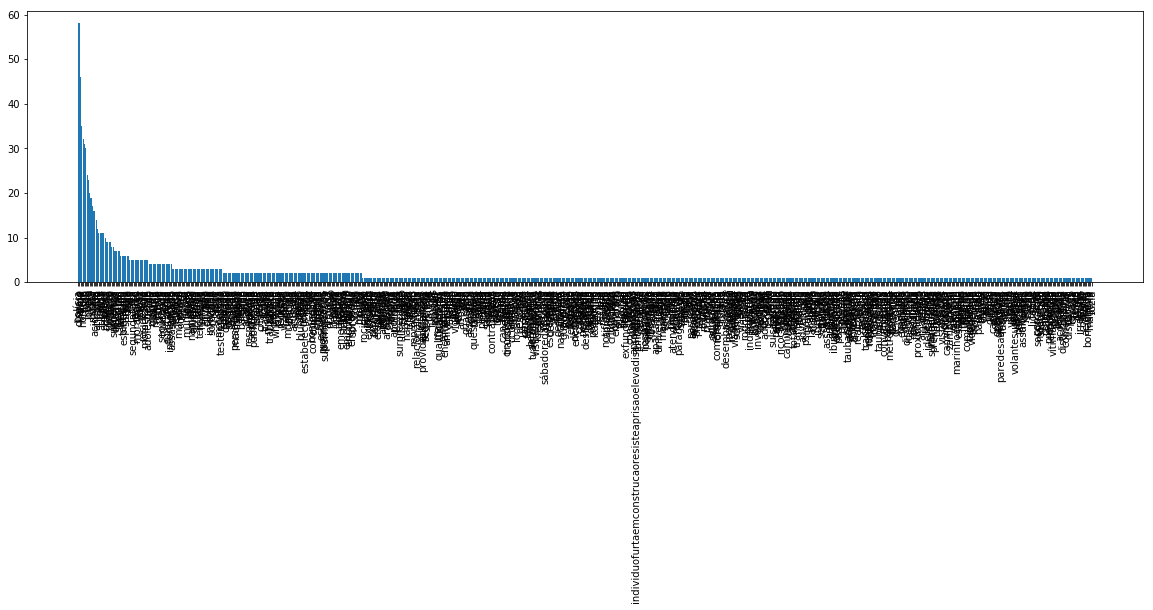

In [17]:
a = counter
plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.bar(range(len(a)), list(a.values()), align='center')
plt.xticks(range(len(a)), list(a.keys()))
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.show()

In [18]:
## Separa o dict gerada pela selecao de 50 palavras mais comuns em duas listas

i=0
words=[]
occurrences=[]
a = counter.most_common(50) # Pega as 50 palavras mais comuns
for i in range(len(a)):
    words.append(a[i][0])
    occurrences.append(a[i][1])
#print(words)
#print(occurrences)

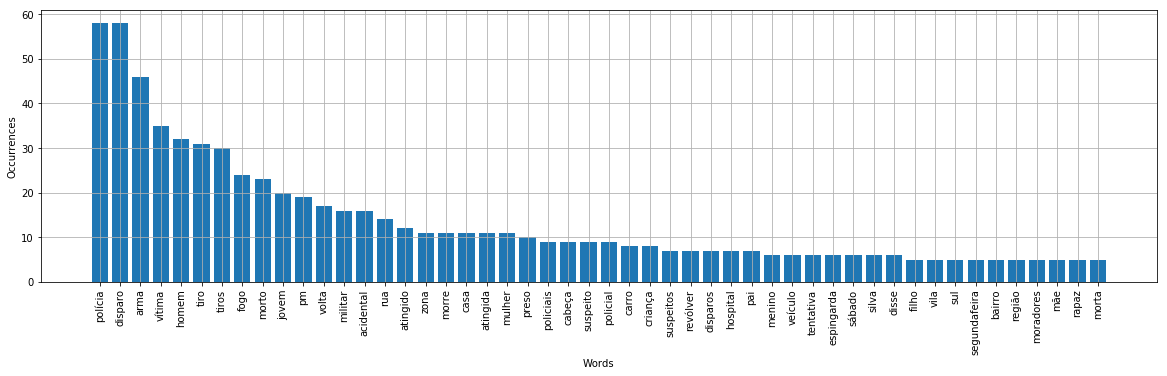

In [19]:
## Analise visual da ocorrencia de palavras

plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.subplot(111) # coordenadas do grafico a ser plotado.
plt.bar(words,occurrences)
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.grid()
plt.show()